<a href="https://colab.research.google.com/github/elhaji1/machine-learning/blob/main/basic_perceptron_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectif pédagogique**
* Réaliser un réseau de neurones basique constitué d'un seul nourone pour la classification biniaire. 
* utiliser la fonction d'activation: sigmoid (fonction logistique)
* mettre en oeuvre le gradient descent comme algorithme d'entrainement du perceptron.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#<font color=red> **I. Dataset**</font>

#1. Générer une Dataset pour la Classification Binaire:</br>

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

#2. afficher les dimensions de X et y

In [ ]:
print(X.shape)
print(y.shape)

#3. Redimensionner y de telle sorte à avoir y de dimension (m, 1)

In [34]:
y=y.reshape(y.shape[0],1)

#4. Visualiser le nuage de Points

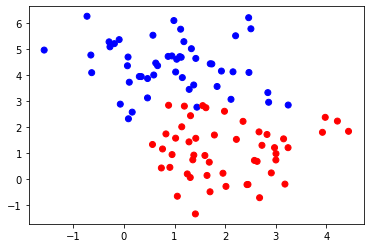

In [6]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='bwr')

#<font color=red> **II. Perceptron**</font>

#5. Fonction d'activation



In [18]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

#6.Initialisation de W et b

In [8]:
def initialize_weights(x):
  weights = np.random.randn(X.shape[1],1)
  biais = np.random.randn(1)
  return (weights,biais)

#7. Prediction (calcul) de la sortie (A)

In [15]:
def forward_propagation(X, W, b):
  z=X.dot(W)+b
  A=sigmoid(z)
  return A

#8. Fonction coût cross_entropie

In [9]:
def cross_entropy(y, A):
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

#9. Calcul de gradients

In [10]:
def gradients(X, A, y):
  dW = 1/len(y)*np.dot(X.T, A-y)
  db = 1/len(y)*np.sum(A-y)
  return (dW, db)

#Entrainement: Gradient Descente

In [21]:
def optimisation(X, W, b, A, y, learning_rate):
  dW, db = gradients(X, A, y)
  W=W - learning_rate * dW
  b=b - learning_rate * db
  return (W, b)

#11. Prediction de la sortie (0 ou 1)

In [12]:
def predict(X, W, b):
  A = forward_propagation(X, W, b)
  return A >= 0.5

#12. implémentation du perceptron

In [44]:
def perceptron(X, y, learning_rate=0.1, n_iter=100):
  W, b = initialize_weights(X) # initialisation de W et b
  
  # entrainement du perceptron
  losses=[]
  for i in range(n_iter):
    A = forward_propagation(X, W, b) # Génération de la sortie A (un nombre appartenant à [0,1] ouvert!)
    loss = cross_entropy(y, A) # Erreur
    losses.append(loss)
    W, b = optimisation(X, W, b, A, y, learning_rate=0.1)#Entrainement

  # Prediction
  y_pred = predict(X, W, b)# prediction de la sortie (0 ou 1) par le modèle

  return (y_pred, W, b,losses)

In [71]:
#implémentation
y_pred, W, b, losses= perceptron(X, y, learning_rate=0.2, n_iter=100)

## 13. Tracer la frontiere de décision

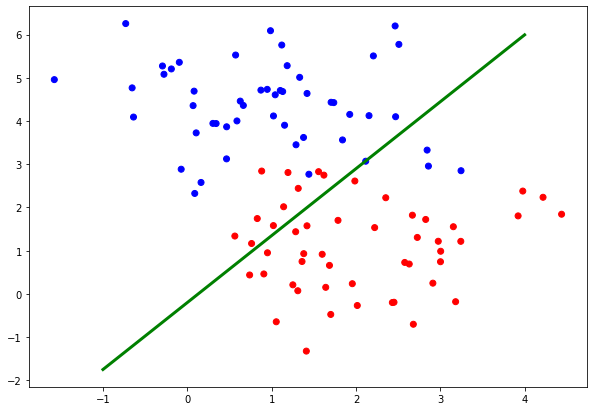

In [72]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')
x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='g', lw=3)


## Learning curve
La courbe d'apprentissage met en évidence l'évolution de l'erreur (losses) en fontion du nombre de l'itérations. l'erreur devrait diminuer au fur à mesure avec les itérations (concept de l'apprentissage). Il permet de vérifier le point de "saturation" de l'apprentissage: il s'agit du point à partir duquel la courbe ne diminue plus. La courbe d'apprentissage ci-dessous que l'apprentissage n'est pas terminé==> il faut,entre autres, augmenter le nombre d'itérations.

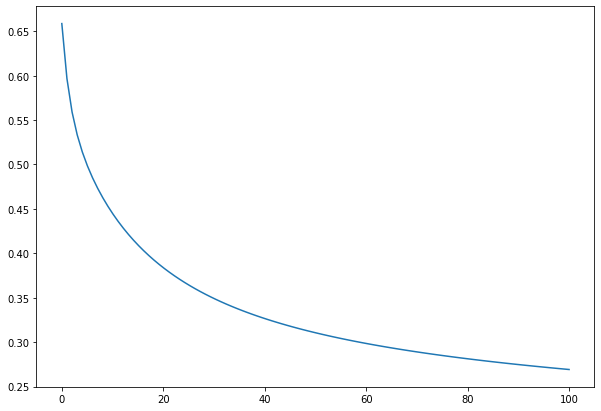

In [73]:
fig, ax = plt.subplots(figsize=(10, 7))
x=np.linspace(0.0, 100.0,100)
ax.plot(x,losses)
ax.legend('loss')